[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xuan-liang/Deep-Learning-Reading-Group/blob/main/Dec11-2020-Chapter3_Zy/Chapter3_Zy.ipynb)

## Some useful links for Keras
* <a href="https://keras.io/getting_started/faq/#what-do-sample-batch-and-epoch-mean">Sample, Batch, Epoch</a>
* <a href="https://keras.io/api/layers/core_layers/dense/">Dense layers</a>
* <a href="https://keras.io/api/losses/">Loss functions</a>
* <a href="https://keras.io/api/optimizers/">Optimizers</a>
* <a href="https://keras.io/api/metrics/">Metrics</a>
* `tf.keras.backend.clear_session()` <a href="https://keras.io/api/utils/backend_utils/">documentation</a> and <a href="https://stackoverflow.com/questions/50895110/what-do-i-need-k-clear-session-and-del-model-for-keras-with-tensorflow-gpu">discussion</a>.






## Cloud GPU
* <a href="https://colab.research.google.com">Google Colab</a>
* <a href="https://console.aws.amazon.com/ec2/v2">Amazon Elastic Compute Cloud (Amazon EC2)</a>
* <a href="https://matpool.com/">Matpool (矩池云)</a>



## Overview of Today's Talk
* Anatomy of a neural network
* Keras
* Overview of typical Keras workflow
* Binary classification example
* Single-label multi-class classification example
* Regression example

# Anatomy of a neural network

* Layers, which are combined into a network (or model)
* The input data $X$ and corresponding targets $Y$
* The loss function, which defines the feedback signal used for learning
* The optimizer, which determines how learning proceeds

In [1]:
import keras

Using TensorFlow backend.
C:\tools\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\tools\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\tools\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\tools\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Pas

## Layers: the building blocks of deep learning

A layer is a data-processing module that takes as input one or more tensors and that outputs one or more tensors. Different layers are appropriate for different tensor formats and different types of data
processing.

* simple vector data, stored in 2D tensors of shape (samples,features), is often processed by densely connected layers, also called fully connected or dense layers (the *Dense* class in Keras). We will mainly deal with this in this talk.
* sequence data, stored in 3D tensors of shape (samples,timesteps, features), is typically processed by recurrent layers such as an *LSTM* layer.
* Image data, stored in 4D tensors, is usually processed by 2D convolution layers (*Conv2D*).

Building deep-learning models in Keras is done by clipping together compatible layers to form useful data-transformation pipelines. The notion of layer compatibility here refers specifically to the fact that every layer will only accept input tensors of a certain shape and will return output tensors of a certain shape. When using Keras, you don’t have to worry about
compatibility, because the layers you add to your models are dynamically built to match the shape of the incoming layer.


Use `network.summary()` to see the output shapes of every layer, including the final output shape.

In [2]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
print(network.input_shape)
network.summary()

(None, 784)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


$$\Huge output1 = relu(dot(W1, input) + b1)$$
$$\Huge output2 = softmax(dot(W2, output1) + b2)$$

Therefore, the first layer (dense_1) will accept as input 2D tensors with shape (n,28*28), and return a tensor with shape (n,512). Similarly, the second layer (dense_2) automatically infer its input shape (n,512) from the first layer, and return a tensor with shape (n,10) as the final output. https://keras.io/api/layers/core_layers/dense/

## Ways to get object attributes in Python

In [3]:
dir(network)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_inbound_node',
 '_add_unique_metric_name',
 '_base_init',
 '_build_input_shape',
 '_built',
 '_cache_output_metric_attributes',
 '_check_trainable_weights_consistency',
 '_compute_previous_mask',
 '_expects_training_arg',
 '_feed_input_names',
 '_feed_input_shapes',
 '_feed_inputs',
 '_get_callback_model',
 '_get_existing_metric',
 '_get_node_attribute_at_index',
 '_get_training_eval_metrics',
 '_handle_metrics',
 '_handle_per_output_metrics',
 '_inbound_nodes',
 '_init_graph_network',
 '_init_subclassed_network',
 '_initial_weights',
 '_input_coordinates',
 '_input_lay

In [4]:
network.__dict__

{'name': 'sequential_1',
 'trainable': True,
 'dtype': 'float32',
 '_is_compiled': False,
 '_expects_training_arg': False,
 '_initial_weights': None,
 'supports_masking': False,
 'optimizer': None,
 '_trainable_weights': [],
 '_non_trainable_weights': [],
 '_updates': [],
 '_losses': [],
 '_per_input_losses': {},
 '_per_input_updates': {},
 '_metrics': [],
 '_layers': [<keras.engine.input_layer.InputLayer at 0x24f06b63828>,
 '_outbound_nodes': [],
 '_inbound_nodes': [<keras.engine.base_layer.Node at 0x24f06b63b70>],
 '_is_graph_network': True,
 '_uses_inputs_arg': True,
 'outputs': [<tf.Tensor 'dense_2/Softmax:0' shape=(?, 10) dtype=float32>],
 'inputs': [<tf.Tensor 'dense_1_input:0' shape=(?, 784) dtype=float32>],
 '_built': True,
 '_build_input_shape': None,
 '_compute_previous_mask': True,
 '_input_layers': [<keras.engine.input_layer.InputLayer at 0x24f06b63828>],
 '_output_layers': [<keras.layers.core.Dense at 0x24f7e010da0>],
 '_input_coordinates': [(<keras.engine.input_layer.Inpu

The above uses the *Sequential* class (only for linear stacks of layers, which is the most common network architecture by far) in to define the two-layer model. Another way to define a model is by using the functional API (for directed acyclic graphs of layers, which lets you build completely arbitrary architectures). More details on functional API are given in Chapter 7. Once your model architecture is defined, it doesn’t matter whether you used a Sequential model or the functional API. The remaining steps (configuring loss function/optimizer/metric and learning) are the same.

With the functional API, you’re manipulating the data tensors that the model processes and applying layers to this tensor as if they were functions. Below is the same model defined using the functional API:

In [5]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(512, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

network_API = models.Model(inputs=input_tensor, outputs=output_tensor)
network_API.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Loss functions and optimizers: keys to configuring the learning process

Loss function (objective function)—The quantity that will be minimized during training. It represents a measure of success for the task at hand. 

Some examples of loss function for common problems are:
* Binary crossentropy for a two-class classification problem, ie. $-y \log(\hat{p}) - (1-y)\log(1-\hat{p}) $
* Categorical crossentropy for a $K$-class classification problem where $K > 2$, ie. $-\sum_{k=1}^{K} y_k \log(\hat{p}_k)$
* Mean-squared error for a regression problem
* Connectionist temporal classification (CTC) for a sequence learning problem. 

More loss functions can be found <a href="https://keras.io/api/losses/">here</a>.

Optimizer—Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).  

Some examples of optimizers are:
* SGD with momentum
* Adagrad
* RMSProp 

The RMSProp optimizer is generally a good enough choice. More optimizers can be found <a href="https://keras.io/api/optimizers/">here</a>.

A metric is a function that is used to judge the performance of your model. Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model. Note that any loss function may be used as a metric.

Some examples of metrics are:
* Accuracy
* True/False positives & negatives
* Mean squared error

More metris can be found <a href="https://keras.io/api/metrics/">here</a>.

In [6]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

We are passing our optimizer, loss function and metrics as strings, which is possible because `rmsprop`, `categorical_crossentropy` and `accuracy` are packaged as part of Keras. Sometimes you may want to configure the parameters of your optimizer, or pass a custom loss function or metric function. The former can be done by passing an optimizer class instance as the `optimizer` argument:

In [7]:
from keras import optimizers

network.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

The latter can be done by passing function objects as the `loss` or `metrics` arguments:

In [8]:
from keras import losses
from keras import metrics

network.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.categorical_crossentropy,
              metrics=[metrics.categorical_accuracy])

## Keras
<figure>
    <img src='image/keras.jpg'/>
    <figcaption>The deep-learning
software and hardware stack</figcaption>
</figure>


Keras relies on a specialized, well-optimized tensor library to handle low-level operations (eg. tensor manipulation and differentiation), serving as the **backend engine** of Keras. Several different backend engines can be plugged seamlessly into Keras. Currently, the three existing backend implementations are the **TensorFlow** backend, the **Theano** backend, and the Microsoft Cognitive Toolkit (**CNTK**) backend.
<br><br>
Any piece of code that you write with Keras can be run with any of these backends without having to change anything in the code: you can seamlessly switch between the two during development, which often proves useful—for instance, if one of these backends
proves to be faster for a specific task. 
<br><br>
Via TensorFlow (or Theano, or CNTK), Keras is able to run seamlessly on both CPUs and GPUs. When running on CPU, TensorFlow is itself wrapping a low-level library for tensor operations called Eigen (http://eigen.tuxfamily.org). On GPU, TensorFlow wraps a library of well-optimized deep-learning operations called the NVIDIA CUDA Deep Neural Network library (cuDNN).

## Check that TensorFlow is installed

In [2]:
import tensorflow as tf
tf.__version__

'1.14.0'

otherwise, run `conda install tensorflow` in the terminal. If you have a GPU with CUDA support, `conda install tensorflow-gpu` to install TensorFlow with GPU support.

## Check that Keras TensorFlow backend is running on GPU or CPU 

In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3405722018220665943
]


In [6]:
with tf.Session() as sess:
  devices = sess.list_devices()
devices

[_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456, 16338367508376815324)]

In [8]:
tf.test.gpu_device_name()

''

You can also run the following function to check whether TensorFlow can access a GPU:

In [7]:
tf.test.is_gpu_available() # True/False 

False

Or only check for GPU's with CUDA support:

In [12]:
tf.test.is_gpu_available(cuda_only=True)

False

## Recommended Options to Run Keras
* If you have a high-end NVIDIA GPU, install everything from scratch on a local Unix workstation. See Appendix A of the textbook. You can then run either local Jupyter notebooks or a regular Python codebase. 
* If not, use the official EC2 Deep Learning AMI (https://console.aws.amazon.com/ec2/v2), and run Keras experiments as Jupyter notebooks on EC2. See Appendix B of the textbook.

## Running Jupyter notebooks on an EC2 GPU instance (Paid)
1. Create an account at https://portal.aws.amazon.com/billing/signup?nc2=h_ct&src=default&redirect_url=https%3A%2F%2Faws.amazon.com%2Fregistration-confirmation#/start.
2. Login as Root user at https://console.aws.amazon.com/ec2/v2.
3. If the region on top right corner is not 'Sydney', change the region to Asia Pacific (Sydney).
4. Click on 'Launch Instance', then follow the steps in Appendix B.3 of textbook to launch an instance. (Note that after selecting AWS Marketplace in Step 2 of Appendix B.3, you need to manually search for 'AWS Deep Learning AMI (Ubuntu 18.04)' and select the first product.)

If the launching fail, then it could be due to your current vCPU limit is set to be 0 for running On-Demand P instances. In that case, you need to go to https://ap-southeast-2.console.aws.amazon.com/servicequotas/home?region=ap-southeast-2#!/ and click on Amazon Elastic Compute Cloud (Amazon EC2). Then，scroll down and look for ‘Running On-Demand P instances' then request quota increase (top right corner) for it. A single p2.xlarge instance will need 4 vCPU, so you will need to change the quota value $\geq 4$.

## Google Colab at https://colab.research.google.com (Free)
* Navigate to 'Edit' -> 'Notebook Settings', and select GPU as hardware accelerator. 
* Run Jupyter notebooks.
* Colab resources are not guaranteed and not unlimited, and the usage limits sometimes fluctuate.
* <a href="https://research.google.com/colaboratory/faq.html">Google Colab FAQ</a>

## Matpool (矩池云）at https://matpool.com/ (Paid)
* After registering an account, go to https://matpool.com/host-market and select your preferred GPU.
* Limited availability.

## Developing with Keras: a quick overview
The typical Keras workflow is:

1. Define training data: input tensors and target tensors. 

In [13]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

2. Define a network of layers (or model) that maps inputs to targets.

In [14]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

3. Configure the learning process by choosing a loss function, an optimizer, and some metrics to monitor.

In [15]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

4. Iterate on the training data by calling the fit() method of the model (usually also involves the use of validation set to tune the hyperparameters first).

In [16]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.2579 - accuracy: 0.9250
Epoch 2/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.1048 - accuracy: 0.9691
Epoch 3/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.0684 - accuracy: 0.9793
Epoch 4/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.0497 - accuracy: 0.9851
Epoch 5/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.0370 - accuracy: 0.9886


# Classifying movie reviews: a binary classification example
## The IMDB dataset
We'll be working with "IMDB dataset", a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) 
have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

The following code will load the dataset (when you run it for the first time, about 80MB of data will be downloaded to your machine):

In [140]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

The argument `num_words=10000` means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words 
will be discarded. This allows us to work with vector data of manageable size.

The variables `train_data` and `test_data` are lists of reviews, each review being a list of word indices (encoding a sequence of words). 
`train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":

In [141]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [142]:
type(train_data[0])

list

List is one of the built-in data structure in Python. Other types of built-in data structure include tuple, set, dictionary, etc. 
<figure>
    <img src='image/py_data_structure.jpeg'/>
    <figcaption></figcaption>
</figure>

In [143]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [144]:
print(len(train_data[0]))

218


Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:

In [226]:
max([max(sequence) for sequence in train_data])

9999

Each word index correspond to a word defined in a dictionary, where the index gives the rarity of the word (larger = more rare):

In [146]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

For example, the most common word is given as:

In [147]:
print(list(word_index.keys())[list(word_index.values()).index(1)])

the


Here's how you can quickly decode one of these reviews back to English words:

In [148]:
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [149]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [209]:
reverse_word_index[1]

'the'

Using the above reversed word index, we can convert the list of review back into English words:

In [151]:
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [152]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [153]:
train_labels[0]

1

## Step 1: Preparing the data


We cannot feed lists of integers into a neural network. We have to turn our lists into tensors. There are two ways we could do that:

* We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape `(samples, word_indices)`, 
then use as first layer in our network a layer capable of handling such integer tensors (the `Embedding` layer, which will be covered in  detail later in the book). https://keras.io/api/layers/core_layers/embedding/
* We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence 
`[3, 5]` into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as 
first layer in our network a `Dense` layer, capable of handling floating point vector data.

We will go with the latter solution. Let's vectorize our data, which we will do manually for maximum clarity:

In [154]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

Here's what our samples look like now:

In [155]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [156]:
x_train.shape

(25000, 10000)

In [157]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [158]:
y_train.shape

(25000,)

## Step 2: Building our network
Our input data is simply vectors, and our labels are scalars (1s and 0s): A type of network that performs well on such a problem would be a simple stack of fully-connected (`Dense`) layers with `relu` activations: `Dense(16, activation='relu')`

The argument being passed to each `Dense` layer (16) is the number of "hidden units" of the layer.  It's a dimension in the representation space of the layer. You may remember from the previous chapter that each such `Dense` layer with a `relu` activation implements 
the following chain of tensor operations:

`output = relu(dot(W, input) + b)`

Having 16 hidden units means that the weight matrix `W` will have shape `(input_dimension, 16)`, i.e. the dot product with `W` will project the input data onto a 16-dimensional representation space (and then we would add the bias vector `b` and apply the `relu` operation). You can intuitively understand the dimensionality of your representation space as "how much freedom you are allowing the network to have when learning internal representations". Having more hidden units (a higher-dimensional representation space) allows your network to learn more complex representations, but it makes your network more computationally expensive and may lead to learning unwanted patterns (patterns that will improve performance on the training data but not on the test data), ie. **overfitting**.

There are two key architecture decisions to be made about such stack of dense layers:

* How many layers to use.
* How many "hidden units" to chose for each layer.

In this case, we will have the following architecture choice:
two intermediate layers with 16 hidden units each, 
and a third layer which will output the scalar prediction regarding the sentiment of the current review. 
The intermediate layers will use `relu` as their "activation function", 
and the final layer will use a sigmoid activation so as to output a probability 
(a score between 0 and 1, indicating how likely the sample is to have the target "1", i.e. how likely the review is to be positive).

<figure>
    <img src='image/3_layer_network.png'/>
    <figcaption></figcaption>
</figure>

In [170]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.input_shape)
model.summary()

(None, 10000)
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_95 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_96 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## Step 3: Configuring the learning process
Since we are dealing with binary classification problem, we can use `binary_crossentropy` loss function. As for the optimizer, we configure our model with the `rmsprop` optimizer. Finally, we monitor `accuracy` during training.

In [171]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Step 4: Fit the model together with validation
In order to monitor during training the accuracy of the model on data that it has never seen before, we will create a "validation set" by setting apart 10,000 samples from the original training data:

In [172]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We will now train our model for 20 epochs (20 iterations over all samples in the `partial_x_train` and `partial_y_train` tensors), in mini-batches of 512 samples. At this same time we will monitor loss and accuracy on the 10,000 samples that we set apart. This is done by passing the validation data as the `validation_data` argument. The purpose of doing this is to help select/tune some hyperparameters, eg. no. of epoch.

In [173]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.5117 - accuracy: 0.8039 - val_loss: 0.4348 - val_accuracy: 0.8069
Epoch 2/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.3122 - accuracy: 0.9007 - val_loss: 0.3108 - val_accuracy: 0.8856
Epoch 3/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.2266 - accuracy: 0.9273 - val_loss: 0.2858 - val_accuracy: 0.8884
Epoch 4/20
15000/15000 [==============================] - 1s 66us/step - loss: 0.1801 - accuracy: 0.9427 - val_loss: 0.2803 - val_accuracy: 0.8886
Epoch 5/20
15000/15000 [==============================] - 1s 66us/step - loss: 0.1471 - accuracy: 0.9529 - val_loss: 0.2829 - val_accuracy: 0.8889
Epoch 6/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.1192 - accuracy: 0.9637 - val_loss: 0.3079 - val_accuracy: 0.8800
Epoch 7/20
15000/15000 [==============================] - 1s 69us/st

On CPU, this will take less than two seconds per epoch -- training is over in 20 seconds. At the end of every epoch, there is a slight pause 
as the model computes its loss and accuracy on the 10,000 samples of the validation data.

Note that the call to `model.fit()` returns a `History` object. This object has a member `history`, which is a dictionary containing data about everything that happened during training.

In [174]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

It contains 4 entries: one per metric that was being monitored, during training and during validation. 

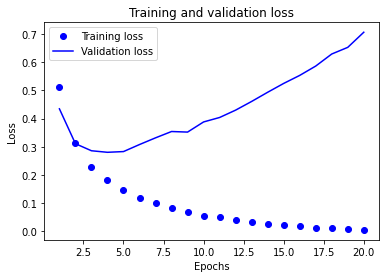

In [175]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

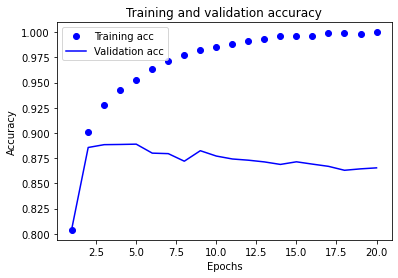

In [176]:
plt.clf()   # clear figure


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The training loss decreases with every epoch and the training accuracy increases with every epoch, which is expected when running gradient descent optimization -- the quantity we are trying to minimize should get lower with every iteration. But that 
isn't the case for the validation loss and accuracy: they seem to peak at the third/fourth epoch. This is an example of **overfitting**: after the second epoch, we are over-optimizing on the training data, and we 
ended up learning representations that are specific to the training data and do not generalize to data outside of the training set.

In this case, to prevent overfitting, we could simply stop training after three/four epochs. Let's train a new network from scratch for four epochs, then evaluate it on our test data:

In [177]:
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=4, batch_size=512)
results = model2.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 54us/step - loss: 0.4704 - accuracy: 0.8152
Epoch 2/4
25000/25000 [==============================] - 1s 42us/step - loss: 0.2733 - accuracy: 0.9085
Epoch 3/4
25000/25000 [==============================] - 1s 42us/step - loss: 0.2070 - accuracy: 0.9268
Epoch 4/4
25000/25000 [==============================] - 2s 71us/step


In [178]:
results

[0.2914161449432373, 0.8840799927711487]

So, our approach gives an accuracy of 88%.

## Making predictions for new data
After training the network, we can use the network to generate the probability of reviews being positive by using the `predict` method:

In [179]:
model2.predict(x_test)

array([[0.1387018 ],
       [0.99812734],
       [0.88641465],
       ...,
       [0.11579096],
       [0.08029947],
       [0.6045158 ]], dtype=float32)

The network is very confident for some samples (0.99) but less confident for others (0.65). Other settings (no. of layers/hidden units, loss function, activation function) can be tried too.

## Conclusion
* In a binary classification problem (two output classes), your network should end with a Dense layer with 1 unit and a sigmoid activation, i.e. the output of your network should be a scalar between 0 and 1, encoding a probability.
* With such a scalar sigmoid output, on a binary classification problem, the loss function that can be used is `binary_crossentropy`.
* As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data never-seen-before. Make sure to always monitor performance on validation data that is outside of the training set.

# Classifying newswires: a single-label multi-class classification example
## The Reuters dataset


We will be working with the _Reuters dataset_, a set of short newswires and their topics, published by Reuters in 1986. It's a very simple, widely used toy dataset for text classification. There are $N$ = 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set.

In [180]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Like with the IMDB dataset, the argument `num_words=10000` restricts the data to the 10,000 most frequently occurring words found in the 
data.

We have 8,982 training examples and 2,246 test examples:

In [181]:
print(len(train_data))
print(len(test_data))

8982
2246


As with the IMDB reviews, each newswire is a list of integers (word indices):

In [182]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

Using similar code, we can convert the list of integers back into words:

In [183]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [184]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

The label associated with a newswire is an integer between 0 and 45: a topic index.

In [185]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [186]:
train_labels[0]

3

## Step 1: Preparing the data
We can vectorize the data with the exact same code as in our previous example:

In [187]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

To vectorize the labels, there are two possibilities: 
* we could just cast the label list as an integer tensor
* we could use a "one-hot" encoding or equivalently "categorical encoding". 

In our case, one-hot encoding of our labels consists of embedding each label as an all-zero vector with a 1 in the place of the label index, e.g.:

In [188]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [189]:
one_hot_train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Note that there is a built-in way to do this in Keras, which have been used in previous MNIST example:

In [190]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [191]:
print(one_hot_train_labels.shape)
one_hot_train_labels

(8982, 46)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Step 2: Building our network
In a stack of `Dense` layers like what we were using, each layer can only access information present in the output of the previous layer. If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each layer can potentially become an "information bottleneck". In our previous example, we were using 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, permanently dropping relevant information.

We will use 
* Two intermediate `Dense` layers with 64 hidden units and `relu` activation function
* An output (third) layer with 46 units and `softmax` activation function

Hence, for each input sample, our network will output a 46-dimensional vector, which contains the *probability distribution* over the 46 output classes.

In [192]:
from keras import models
from keras import layers

model3 = models.Sequential()
model3.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(46, activation='softmax'))

## Step 3: Configuring the learning process
Since we are dealing with multiclass classification problem, we can use `categorical_crossentropy` loss function. As for the optimizer, we configure our model with the `rmsprop` optimizer. Finally, we monitor `accuracy` during training.

In [193]:
model3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Step 4: Fit the model together with validation
Set apart 1,000 samples in training data to use as a validation set:

In [194]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [61]:
history = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 95us/step - loss: 2.8036 - accuracy: 0.5050 - val_loss: 1.8592 - val_accuracy: 0.6180
Epoch 2/20
7982/7982 [==============================] - 0s 62us/step - loss: 1.4977 - accuracy: 0.6954 - val_loss: 1.3229 - val_accuracy: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 67us/step - loss: 1.0886 - accuracy: 0.7657 - val_loss: 1.1395 - val_accuracy: 0.7590
Epoch 4/20
7982/7982 [==============================] - 1s 76us/step - loss: 0.8598 - accuracy: 0.8185 - val_loss: 1.0293 - val_accuracy: 0.7870
Epoch 5/20
7982/7982 [==============================] - 0s 60us/step - loss: 0.6935 - accuracy: 0.8571 - val_loss: 0.9698 - val_accuracy: 0.7980
Epoch 6/20
7982/7982 [==============================] - 0s 60us/step - loss: 0.5597 - accuracy: 0.8849 - val_loss: 0.9209 - val_accuracy: 0.8200
Epoch 7/20
7982/7982 [==============================] - 1s 67us/step - loss: 0.454

In [62]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

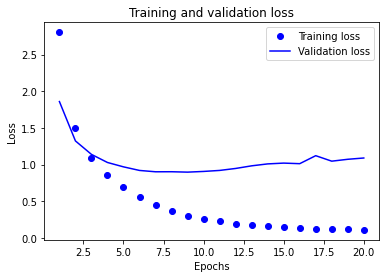

In [63]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

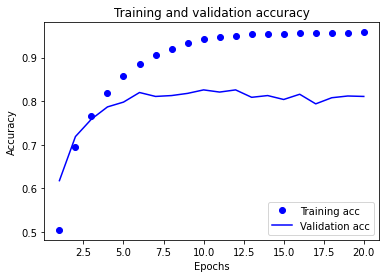

In [64]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

It seems that the network starts overfitting after 8 (or 9) epochs. So, we train a new network from scratch for 8 epochs, then evaluate it on the test set:

In [196]:
model4 = models.Sequential()
model4.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(46, activation='softmax'))

model4.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model4.fit(x_train,one_hot_train_labels,epochs=8,batch_size=512)
results = model4.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
8982/8982 [==============================] - 1s 88us/step - loss: 2.3939 - accuracy: 0.5514
Epoch 2/8
8982/8982 [==============================] - 1s 62us/step - loss: 1.3100 - accuracy: 0.7199
Epoch 3/8
8982/8982 [==============================] - 0s 55us/step - loss: 0.9885 - accuracy: 0.7909
Epoch 4/8
8982/8982 [==============================] - 1s 59us/step - loss: 0.7765 - accuracy: 0.8351
Epoch 5/8
8982/8982 [==============================] - 0s 55us/step - loss: 0.6122 - accuracy: 0.8727
Epoch 6/8
8982/8982 [==============================] - 1s 64us/step - loss: 0.4876 - accuracy: 0.8988
Epoch 7/8
8982/8982 [==============================] - 0s 55us/step - loss: 0.3941 - accuracy: 0.9177
Epoch 8/8
2246/2246 [==============================] - 0s 160us/step


In [197]:
results

[0.9582945192274194, 0.7938557267189026]

Our approach reaches an accuracy of 79%. For comparison, we find the accuracy of purely random classifier below:

In [198]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.17853962600178094

In [199]:
import random

test_labels_rand = np.zeros(len(test_labels))
for i in range(len(test_labels)):
    test_labels_rand[i] = random.randint(0,45)

float(np.sum(np.array(test_labels) == np.array(test_labels_rand))) / len(test_labels)

0.02315227070347284

So, the results of our approach seem pretty good, at least when compared to a random baseline.

## Making predictions for new data
We can use the trained network to generate the probability of different classes by using the `predict` method:

In [227]:
predictions = model4.predict(x_test)
predictions

array([[1.14622548e-04, 6.17780897e-04, 4.34426292e-05, ...,
        5.58998763e-05, 1.81160758e-05, 2.51830770e-05],
       [4.45784582e-03, 3.01638409e-03, 2.37399456e-03, ...,
        1.00476056e-04, 2.47545213e-05, 3.67548782e-04],
       [6.30520517e-03, 7.85011351e-01, 2.05503264e-03, ...,
        2.07020843e-04, 1.89444894e-04, 6.57863216e-04],
       ...,
       [9.90419139e-05, 2.97751656e-04, 5.44243994e-06, ...,
        5.79880107e-05, 1.34298398e-05, 2.06907189e-05],
       [1.83790596e-03, 4.62396219e-02, 1.26261672e-03, ...,
        1.95248739e-03, 1.14858500e-03, 1.14723796e-03],
       [2.59570486e-04, 6.10827565e-01, 1.32756317e-02, ...,
        1.57585790e-04, 1.94635912e-04, 2.63955386e-04]], dtype=float32)

In [228]:
predictions[0].shape

(46,)

The probabilities in each 46-dimensional vector sum to 1:

In [229]:
np.sum(predictions[0])

0.9999999

The largest entry is the predicted class, i.e. the class with the highest probability:

In [230]:
np.argmax(predictions[0])

3

## A different way to handle the labels and the loss
As mentioned above, another way to encode the labels would be to cast them as an integer tensor: 

In [207]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
y_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

The only thing it would change is the choice of the loss function. Our previous loss, `categorical_crossentropy`, expects the labels to follow a categorical encoding. With integer labels, we should use `sparse_categorical_crossentropy`:

In [74]:
model3.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

This new loss function is still mathematically the same as `categorical_crossentropy`; it just has a different interface.

## On the importance of having sufficiently large intermediate layers


We mentioned earlier that since our final outputs were 46-dimensional, we should avoid intermediate layers with much less than 46 hidden units. We can try to see what happens when we introduce an information bottleneck by having intermediate layers significantly less than 46-dimensional, e.g. 4-dimensional.

In [234]:
model5 = models.Sequential()
model5.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model5.add(layers.Dense(4, activation='relu'))
model5.add(layers.Dense(46, activation='softmax'))

model5.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history =model5.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 111us/step - loss: 3.5937 - accuracy: 0.1312 - val_loss: 3.3212 - val_accuracy: 0.3400
Epoch 2/20
7982/7982 [==============================] - 1s 66us/step - loss: 3.0806 - accuracy: 0.4010 - val_loss: 2.8511 - val_accuracy: 0.4470
Epoch 3/20
7982/7982 [==============================] - 1s 63us/step - loss: 2.5809 - accuracy: 0.4731 - val_loss: 2.4023 - val_accuracy: 0.4750
Epoch 4/20
7982/7982 [==============================] - 1s 64us/step - loss: 2.1246 - accuracy: 0.5133 - val_loss: 2.0328 - val_accuracy: 0.5360
Epoch 5/20
7982/7982 [==============================] - 1s 63us/step - loss: 1.7661 - accuracy: 0.6220 - val_loss: 1.7654 - val_accuracy: 0.6200
Epoch 6/20
7982/7982 [==============================] - 1s 67us/step - loss: 1.5033 - accuracy: 0.6949 - val_loss: 1.5825 - val_accuracy: 0.6720
Epoch 7/20
7982/7982 [==============================] - 0s 62us/step - loss: 1.31

Our network now seems to peak at ~71% validation accuracy, an 8-9% absolute drop compared to the previous network with 64 units intermediate layers. This drop is mostly due to the fact that we are now trying to compress a lot of information (enough information to recover the separation hyperplanes of 46 classes) into an intermediate space that is too low-dimensional. The network is able to cram *most* of the necessary information into these 4-dimensional representations, but not all 
of it.

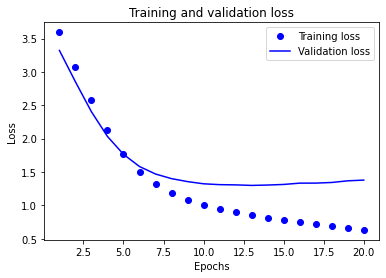

In [237]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

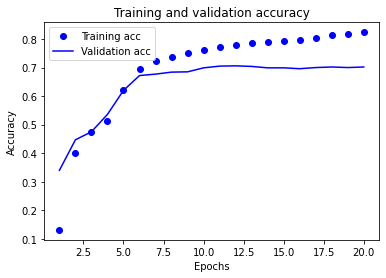

In [238]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

It seems that the network starts overfitting after around 10 epochs. So, we train a new network from scratch for 10 epochs, then evaluate it on the test set:

In [239]:
model6 = models.Sequential()
model6.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model6.add(layers.Dense(4, activation='relu'))
model6.add(layers.Dense(46, activation='softmax'))

model6.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model6.fit(x_train,one_hot_train_labels, epochs=10,batch_size=512)
results = model6.evaluate(x_test, one_hot_test_labels)

Epoch 1/10
8982/8982 [==============================] - 1s 83us/step - loss: 3.1354 - accuracy: 0.2111
Epoch 2/10
8982/8982 [==============================] - 1s 59us/step - loss: 2.4093 - accuracy: 0.2325
Epoch 3/10
8982/8982 [==============================] - 1s 57us/step - loss: 2.0453 - accuracy: 0.5048
Epoch 4/10
8982/8982 [==============================] - 1s 60us/step - loss: 1.8020 - accuracy: 0.5793
Epoch 5/10
8982/8982 [==============================] - 0s 55us/step - loss: 1.6204 - accuracy: 0.6137
Epoch 6/10
8982/8982 [==============================] - 1s 59us/step - loss: 1.4773 - accuracy: 0.6283
Epoch 7/10
8982/8982 [==============================] - 0s 55us/step - loss: 1.3602 - accuracy: 0.6396
Epoch 8/10
8982/8982 [==============================] - 1s 62us/step - loss: 1.2594 - accuracy: 0.6540
Epoch 9/10
8982/8982 [==============================] - 1s 65us/step - loss: 1.1706 - accuracy: 0.6943
Epoch 10/10
2246/2246 [==============================] - 0s 155us/step


In [240]:
results

[1.4574700234091293, 0.6696348786354065]

The test accuracy is ~67%, which is smaller than the test accuracy of 78% for previous network.

## Conclusion
* In a multi-class classification problem with N classes, your network should end with a `Dense` layer of size N.
* For single-label multi-class classification problem, your network should end with a `softmax` activation, so that it will output a probability distribution over the N output classes.
* `Categorical crossentropy` is almost always the loss function you should use for such problems.
* There are two ways to handle labels in multi-class classification:<br>
    * Encoding the labels via "categorical encoding" (also known as "one-hot encoding") and using `categorical_crossentropy` as your loss function.<br>
    * Encoding the labels as integers and using the `sparse_categorical_crossentropy` loss function.<br>
* If you need to classify data into a large number $N$ of categories, then you should avoid creating information bottlenecks in your network by having intermediate layers that are too small, ie. with much smaller number of hidden units.

# Predicting house prices: a regression example
We will be attempting to predict the median price of homes in a given Boston suburb in the mid-1970s, given a few data points (or features) about the suburb at the time, such as the crime rate, the local property tax rate, etc.

In [80]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [81]:
train_data.shape

(404, 13)

In [82]:
test_data.shape

(102, 13)

We only have 404 training samples and 102 test samples. The data comprises 13 features. The 13 features in the input data are as follow:

1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per \\$10,000.
11. Pupil-teacher ratio by town.
12. $1000 \times (Bk - 0.63)^2$ where Bk is the proportion of Black people by town.
13. % lower status of the population.

Two points to note
* Small sample sizes
* each feature has a different scale

The targets are the median values of owner-occupied homes, in thousands of dollars:

In [83]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

## Step 1: Preparing the data
It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation. This is easily done in Numpy:

In [84]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

Note that the quantities that we use for normalizing the test data have been computed using the training data. We should never use in our workflow any quantity computed on the test data, even for something as simple as data normalization.

## Step 2: Building our network
Because so few samples are available, we will be using a very small network:
* Two hidden layers with 64 units and `relu` activation function
* Output (third) layer with one unit with no activation, ie. linear layer (since we are dealing with regression problem)

In general, the less training data you have, the worse overfitting will be, and using a small network is one way to mitigate overfitting.

## Step 3: Configuring the learning process
Since we are dealing with regression problem, we can use `mse` loss function. As for the optimizer, we configure our model with the `rmsprop` optimizer. Finally, we monitor `mae` (Mean Absolute Error) during training.

In [128]:
from keras import models
from keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

## Step 4: Fit the model together with validation
Due to the small sample size we have, the validation set approach will results in high variance for the validation scores. So, we will use K-fold cross validation instead, to tune the hyperparameters (such as the number of epochs used for training)

### K-fold cross validation
It consists of splitting the available data into K partitions (typically K=4 or 5), then instantiating K identical models, and training each one on K-1 partitions while evaluating on the remaining partition. The validation score for the model used would then be the average of the K validation scores obtained.

In [129]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [130]:
all_scores

[2.2105789184570312, 2.710846185684204, 2.918855905532837, 2.737666606903076]

In [131]:
np.mean(all_scores)

2.644486904144287

The average is a much more reliable metric than any single of the four scores. In this case, we are off by around \\$2,650 on average, which is still significant considering that the prices range from \\$10,000 to \\$50,000.

Next, we will train the network for a bit longer: 500 epochs. To keep track of how well the model did at each epoch, we will modify our training loop to save the per-epoch validation score log. This allows us to select/tune the no. of epoch later.

In [89]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

`K.clear_session()` is to removes all the nodes left over in TensorFlow graph from previous models, freeing memory and preventing slowdown. For more information, refer to this <a href="https://keras.io/api/utils/backend_utils/">documentation</a> and <a href="https://stackoverflow.com/questions/50895110/what-do-i-need-k-clear-session-and-del-model-for-keras-with-tensorflow-gpu">discussion</a>.

In [113]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [114]:
all_mae_histories[0]

[3.5791752338409424,
 3.282008171081543,
 3.1494345664978027,
 2.770390510559082,
 2.3319308757781982,
 2.9422237873077393,
 2.6865267753601074,
 2.2640604972839355,
 2.90531063079834,
 2.587739944458008,
 2.1700379848480225,
 2.251910448074341,
 2.0766608715057373,
 2.8083767890930176,
 2.250520706176758,
 1.9147086143493652,
 2.0446689128875732,
 2.0724081993103027,
 2.2334096431732178,
 2.176100254058838,
 1.8378697633743286,
 2.002094030380249,
 2.0080626010894775,
 1.9154367446899414,
 1.9427293539047241,
 2.2005553245544434,
 1.9766371250152588,
 2.0456931591033936,
 2.0965747833251953,
 1.8056042194366455,
 1.8826115131378174,
 1.9579873085021973,
 2.2439589500427246,
 1.9844326972961426,
 1.9263333082199097,
 2.4618964195251465,
 1.9254381656646729,
 1.957099199295044,
 2.1111059188842773,
 2.1003031730651855,
 1.8874846696853638,
 2.455251455307007,
 2.307032346725464,
 1.8998397588729858,
 1.7969874143600464,
 1.9974033832550049,
 1.9105390310287476,
 1.74688720703125,
 1.728

We can then compute the average of the per-epoch MAE scores for all folds:

In [115]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

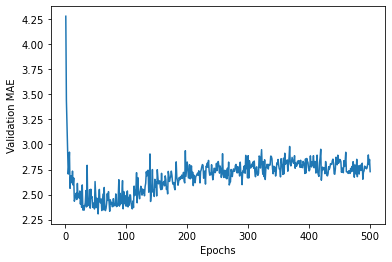

In [116]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

It may be a bit hard to see the plot due to scaling issues and relatively high variance. Let's:

* Omit the first 10 data points, which are on a different scale from the rest of the curve.
* Replace each point with an exponential moving average of the previous points, to obtain a smooth curve.

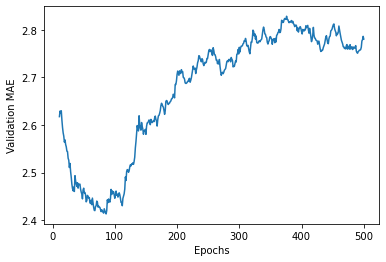

In [117]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(11, len(smooth_mae_history) + 11), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

According to this plot, it seems that validation MAE stops improving significantly after 80-90 epochs. Past that point, we start overfitting.

Once we are done tuning other parameters of our model (besides the number of epochs, we could also adjust the size of the hidden layers), we can train a final "production" model on all of the training data, with the best parameters, then look at its performance on the test data:

In [134]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step


In [135]:
test_mae_score

2.6140286922454834

We are still off by about \\$2,600 on average.

## Making predictions for new data

In [138]:
predictions = model.predict(test_data)
predictions

array([[ 9.839417],
       [20.05707 ],
       [22.035736],
       [34.32895 ],
       [25.849102],
       [21.96819 ],
       [28.503716],
       [21.364992],
       [21.170486],
       [22.673906],
       [17.766834],
       [17.908905],
       [16.72816 ],
       [43.96984 ],
       [20.687086],
       [20.74221 ],
       [26.215515],
       [19.400566],
       [19.922176],
       [26.064777],
       [12.476087],
       [14.119743],
       [22.101042],
       [16.836277],
       [20.49749 ],
       [25.657612],
       [30.236465],
       [30.918898],
       [11.75483 ],
       [19.691519],
       [20.413204],
       [16.240543],
       [33.964424],
       [24.102936],
       [17.972095],
       [ 9.024531],
       [17.135395],
       [17.139038],
       [20.391048],
       [26.75076 ],
       [31.699686],
       [28.658102],
       [13.991808],
       [44.7191  ],
       [28.91957 ],
       [26.65857 ],
       [27.154413],
       [18.255306],
       [23.585281],
       [23.644371],


## Conclusion
* For regression problem, Mean Squared Error (`mse`) is a commonly used loss function and Mean Absolute Error (`mae`) is a common regression metric.
* When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
* When little training data is available, it is preferable to use a small network with very few hidden layers (typically only one or two), in order to avoid severe overfitting.
* When there is little data available, using K-Fold cross validation is a great way to reliably evaluate a model.
